<a href="https://colab.research.google.com/github/zia207/Survival_Analysis_Python/blob/main/Colab_Notebook/02_07_04_04_survival_analysis_marginal_models_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![alt text](http://drive.google.com/uc?export=view&id=1IFEWet-Aw4DhkkVe1xv_2YYqlvRe9m5_)

# 4.4 Marginal Models for Recurrent Events


Marginal models are a class of statistical approaches used in survival analysis to handle recurrent events data, where a subject can
experience multiple events over time (e.g., repeated hospitalizations, infections, or seizures). These models focus on estimating the
**population-averaged** (or marginal) effects of covariates on the event rate or mean number of events, without explicitly modeling the
dependence structure among recurrent events within the same individual. Instead, they rely on robust variance estimators (e.g., sandwich
estimators) to account for within-subject correlation, making them flexible when the exact form of dependence is unknown or complex.


### Key Features of Marginal Models


1.  **Population-Averaged Effects**: Marginal models estimate the average effect of covariates on the event rate across the entire
    population, rather than subject-specific effects. This is useful for understanding overall treatment effects in clinical trials or
    public health studies.

2.  **Robust Variance Estimation**: They use robust (sandwich) variance estimators to adjust standard errors for within-subject correlation,
    allowing valid inference even when the dependence structure is misspecified.

3, **Unconditional Risk Sets**: Marginal models typically define risk sets that include all subjects at risk for each event stratum,
ignoring the order of events. This contrasts with conditional models that may restrict risk sets based on prior event history.

4.  **Flexible Covariate Effects**: Covariates can have different effects on different event strata (e.g., first vs. second recurrence),
    allowing for heterogeneity in risk factors across events.


## Common Marginal Models

### Wei-Lin-Weissfeld (WLW) Model


A popular marginal model that treats each event stratum as a separate process, allowing for different baseline hazards and covariate effects
for each event. It uses a robust variance estimator to account for within-subject correlation.

-   Proposed by **Wei, Lin & Weissfeld (1989)** for **ordered recurrent events**.

-   Fits a **Cox proportional hazards model** for each event number (k):

$$
  \lambda_k(t | X) = \lambda_{k0}(t)\exp(\beta^\top X)
$$

-   Different baseline hazard for each event number (via `strata(event_number)`).

-   Usually assumes a **common covariate effect** (\beta) across events, though it can vary by stratum.

-   **Key features:**

    -   Each event order analyzed *marginally* — subjects contribute to all event orders (even if earlier events not yet occurred).
    -   **Death is treated as censoring** (no explicit handling as a terminal event).
    -   Uses **robust (sandwich)** variance to account for within-subject correlation.

-   **Interpretation:** WLW gives the *marginal hazard ratio* for the k-th event, adjusted for covariates, without modeling dependence
    between events or death.


### Marginal Mean Models


These models directly estimate the marginal mean function of the number of events over time, often using counting process techniques and
robust variance estimation.

-   Developed by **Ghosh & Lin (2000, 2002)** to handle **recurrent events with a terminating event (death)**.

-   It’s **not** a hazard model — it’s an *estimation procedure* for the **marginal mean number of recurrent events** by time (t):

$$
  M(t) = \int_0^t S(u), dR(u)
$$ where:

-   (S(u)): survival probability up to time (u)

-   (R(u)): cumulative hazard (rate) of recurrent events among survivors.

-   The two models (for death and recurrence) are fit separately (e.g., via `phreg()` in `mets`), and combined to estimate:

$$
  \widehat{M}(t) = \int_0^t \widehat{S}(u), d\widehat{R}(u)
$$

-   **Lin & Ghosh (2000)** derived *fast influence-function-based* standard errors for this estimator.

-   **Key features:**

    -   Explicitly incorporates **death as a terminal event** — no events after death.
    -   Provides a **population-level mean curve**: expected number of recurrences up to time *t*, accounting for death.
    -   Implemented in `mets::recurrentMarginal()`.

-   **Interpretation:** Gives an **absolute, interpretable summary** — e.g., *“By 3 years, patients in group A have an expected 1.8
    recurrences on average.”*


### Key Differences Between WLW and Marginal Mean Models


Both the **Wei–Lin–Weissfeld (WLW)** model and the **marginal mean method** deal with recurrent events, but they address **different
scientific questions**, use **different estimands**, and rely on **different modeling frameworks**.

| Aspect | **Wei–Lin–Weissfeld (WLW)** | **Lin & Ghosh (2000) Marginal Mean** |
|:---------------------------------|:--------------------------------------------|:------------------------------------------------------------|
| **Type of model** | *Cox regression model* (semiparametric hazard model) | *Nonparametric / semiparametric estimator* of cumulative mean function |
| **Quantity estimated** | *Hazard ratio* for each event order | *Expected number (mean) of recurrent events* up to time *t* |
| **Framework** | Regression modeling of time to each event | Marginal mean function accounting for death |
| **Focus** | *Instantaneous rate* of event occurrence | *Cumulative number* of events over time |


## Cheeck and Load Required Packages

In [3]:
import subprocess
import sys

def install_and_import(package_name, import_name=None):
    """Install a package if not already installed and import it"""
    if import_name is None:
        import_name = package_name

    try:
        # Try to import the package
        globals()[import_name] = __import__(import_name)
        print(f"{package_name} is already installed")
    except ImportError:
        # If not installed, install it
        print(f"Installing {package_name}...")
        try:
            subprocess.check_call([sys.executable, "-m", "pip", "install", package_name])
            globals()[import_name] = __import__(import_name)
            print(f"{package_name} installed successfully")
        except Exception as e:
            print(f"Failed to install {package_name}: {e}")
            raise

# List of packages to check/install
packages = ['pandas', 'numpy', 'matplotlib', 'seaborn', 'scikit-learn', 'scikit-survival', 'lifelines', 'statsmodels']

# Install and import each package
for pkg in packages:
    try:
        install_and_import(pkg)
    except Exception as e:
        print(f"Error with package {pkg}: {e}")

# Verify installation by importing
print("Installed packages:")
for pkg in packages:
    try:
        __import__(pkg)
        print(f"✓ {pkg}")
    except ImportError:
        print(f"✗ {pkg}")

pandas is already installed
numpy is already installed
matplotlib is already installed
seaborn is already installed
Installing scikit-learn...
Failed to install scikit-learn: No module named 'scikit-learn'
Error with package scikit-learn: No module named 'scikit-learn'
Installing scikit-survival...
Failed to install scikit-survival: No module named 'scikit-survival'
Error with package scikit-survival: No module named 'scikit-survival'
lifelines is already installed
statsmodels is already installed
Installed packages:
✓ pandas
✓ numpy
✓ matplotlib
✓ seaborn
✗ scikit-learn
✗ scikit-survival
✓ lifelines
✓ statsmodels


In [4]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from lifelines import CoxPHFitter, KaplanMeierFitter
from lifelines.statistics import multivariate_logrank_test
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")


## Implementation in Python

### Marginal Mean of Recurrent Events


In studies where subjects may experience **repeated (recurrent) events** and eventually a **terminal event** (e.g., death), standard
recurrence analysis is biased if death is ignored, since no further events can occur after death.

To address this, the **marginal mean function** gives the *expected number of recurrent events by time* (t), accounting for both recurrence
and death processes.

Let

-   $R(t)$: cumulative hazard (rate) of recurrent events among survivors,
-   $S(t)$: survival probability (probability of being alive at time $t$).

Then the **marginal mean number of recurrent events** up to time $t$ is

$$
M(t) = \int_0^t S(u), dR(u)
$$

Two proportional hazards (Cox-type) models are fitted:

1.  **Recurrent event model:**

$$
   \lambda_r(t|x) = \lambda_{r0}(t)\exp(x^\top \beta_r)
$$

2.  **Death (terminal event) model:**

$$
   \lambda_d(t|x) = \lambda_{d0}(t)\exp(x^\top \beta_d)
$$

The **baseline survival function** is estimated from the death model as

$$
\widehat{S}(t|x=0) = \exp!\left(-\widehat{\Lambda}_d(t|x=0)\right)
$$

where $\widehat{\Lambda}_d(t|x=0)$ is the estimated cumulative baseline hazard for death.

The **cumulative recurrence rate** among survivors is estimated as

$\widehat{R}(t|x=0) = \widehat{\Lambda}_r(t|x=0$.

`Estimator of the Marginal Mean`

The estimator of $M(t)$ for the baseline group $(x=0)$ is

$$
\widehat{M}(t) = \int_0^t \widehat{S}(u|x=0), d\widehat{R}(u|x=0)
$$

In discrete form (numerical integration):

$$
\widehat{M}(t) \approx \sum_{u_i \le t} \widehat{S}(u_i), \Delta \widehat{R}(u_i)
$$

`Variance Estimation`

The **Lin and Ghosh (2000)** method provides a *fast, robust variance estimator* for $\widehat{M}(t)$, combining the variability from both
the recurrent and death models through a **sandwich (influence function) approach**.

`Interpretation`

$\widehat{M}(t)$ gives the **expected number of recurrent events** a typical subject would experience by time $t$, properly adjusted for
the fact that **death stops further recurrences**.


#### Data


The **`bladder1`** dataset in `survival` contains data from a bladder cancer study with *recurrent tumor events* and *death or censoring*.



In [5]:
# Load bladder1 dataset
url = "https://raw.githubusercontent.com/zia207/Survival_Analysis_Python/main/Data/bladder1.csv"
df = pd.read_csv(url)

# Display basic information
print("Dataset shape:", df.shape)
print("\nFirst 5 rows:")
print(df.head())
print("\nColumn names:", df.columns.tolist())
print("\nEvent types (status):", df['status'].unique())
print("Distribution of event types:")
print(df['status'].value_counts())

# Rename columns to match R tutorial
df = df.rename(columns={'rx': 'treatment', 'enum': 'event_order'})

# Convert treatment to categorical
df['treatment'] = pd.Categorical(df['treatment'])

# Create recurrent event indicator (status == 1 is recurrence)
df['recur'] = (df['status'] == 1).astype(int)

print("\nData preparation complete!")
print(f"Number of subjects: {df['id'].nunique()}")
print(f"Total number of observations: {len(df)}")

Dataset shape: (294, 12)

First 5 rows:
   Unnamed: 0  id treatment  number  size  recur  start  stop  status rtumor  \
0           1   1   placebo       1     1      0      0     0       3      .   
1           2   2   placebo       1     3      0      0     1       3      .   
2           3   3   placebo       2     1      0      0     4       0      .   
3           4   4   placebo       1     1      0      0     7       0      .   
4           5   5   placebo       5     1      0      0    10       3      .   

  rsize  enum  
0     .     1  
1     .     1  
2     .     1  
3     .     1  
4     .     1  

Column names: ['Unnamed: 0', 'id', 'treatment', 'number', 'size', 'recur', 'start', 'stop', 'status', 'rtumor', 'rsize', 'enum']

Event types (status): [3 0 1 2]
Distribution of event types:
status
1    189
0     76
3     27
2      2
Name: count, dtype: int64

Data preparation complete!
Number of subjects: 118
Total number of observations: 294


### Functions for Marginal Models

Since Python doesn't have direct equivalents to R's mets::recurrentMarginal():

- WLW model is implemented via stratified Cox models with robust standard errors

- Marginal mean model uses separate Cox models for recurrent and terminal events

- Numerical integration approximates the marginal mean function


We create three key functions to implement these models:

- `fit_wlw_model()`: Implements Wei-Lin-Weissfeld marginal model

- `fit_marginal_mean_model()`: Estimates expected number of recurrences accounting for death

- `plot_marginal_means()`: Visualizes marginal mean functions

In [6]:
# ==============================================================================
# CUSTOM MARGINAL MODEL FUNCTIONS
# ==============================================================================

class MarginalRecurrentModels:
    """
    Custom implementation of Marginal Models for Recurrent Events
    """

    @staticmethod
    def fit_wlw_model(data, time_col='stop', start_col='start',
                     event_col='recur', strata_col='event_order',
                     cluster_col='id', treatment_col='treatment'):
        """
        Fit Wei-Lin-Weissfeld (WLW) Marginal Model

        Parameters:
        -----------
        data : pandas DataFrame
            Data in counting process format
        time_col : str
            Column name for event/censoring time
        start_col : str
            Column name for start time (for counting process)
        event_col : str
            Column name for event indicator
        strata_col : str
            Column name for event order/stratum
        cluster_col : str
            Column name for subject ID
        treatment_col : str
            Column name for treatment variable

        Returns:
        --------
        dict: Dictionary containing model results and summary statistics
        """

        # Prepare data for WLW model
        # For WLW, we need to create separate strata for each event order
        results = {}

        # Get unique event orders
        unique_strata = sorted(data[strata_col].unique())
        results['strata'] = unique_strata

        # Fit Cox model for each stratum with robust standard errors
        stratum_results = []

        for stratum in unique_strata:
            stratum_data = data[data[strata_col] == stratum].copy()

            if len(stratum_data) > 0:
                # Fit Cox model with cluster-robust standard errors
                cph = CoxPHFitter()

                # Prepare covariates
                X = pd.get_dummies(stratum_data[[treatment_col]],
                                  columns=[treatment_col], drop_first=True)
                X['cluster'] = stratum_data[cluster_col]

                # Create duration and event columns for fitting
                fit_df = pd.DataFrame({
                    'duration': stratum_data[time_col] - stratum_data[start_col],
                    'event': stratum_data[event_col]
                }, index=stratum_data.index)

                # Concatenate with covariates for fitting
                fit_data_combined = pd.concat([fit_df, X], axis=1)

                # Fit model
                try:
                    cph.fit(fit_data_combined,
                           duration_col='duration',
                           event_col='event',
                           cluster_col='cluster',
                           robust=True)

                    # Store results
                    coef_df = cph.summary.copy()
                    coef_df['stratum'] = stratum
                    # Store original index (covariate names) as a column
                    coef_df['covariate'] = coef_df.index.astype(str)
                    stratum_results.append(coef_df)

                except Exception as e:
                    print(f"Warning: Could not fit model for stratum {stratum}: {e}")

        if stratum_results:
            results['coefficients'] = pd.concat(stratum_results, ignore_index=True)

            # Calculate average treatment effect across strata (weighted by sample size)
            stratum_weights = []
            stratum_effects = []

            for stratum in unique_strata:
                stratum_data = data[data[strata_col] == stratum]
                if len(stratum_data) > 0:
                    # Get treatment effect for this stratum
                    stratum_results_df = results['coefficients']
                    stratum_coef = stratum_results_df[
                        (stratum_results_df['stratum'] == stratum) &
                        (stratum_results_df['covariate'].str.contains('treatment')) # Use 'covariate' column
                    ]

                    if not stratum_coef.empty:
                        # Only add finite hazard ratios to the list
                        hr_val = np.exp(stratum_coef['coef'].iloc[0]) # Use coef not exp(coef) to avoid inf intermediate
                        if np.isfinite(hr_val):
                            stratum_weights.append(len(stratum_data))
                            stratum_effects.append(hr_val)

            if stratum_effects and stratum_weights:
                weights = np.array(stratum_weights) / np.sum(stratum_weights)
                avg_hr = np.average(stratum_effects, weights=weights)
                results['average_hr'] = avg_hr
                results['weighted_avg'] = True
            else:
                results['average_hr'] = np.nan # No finite HRs to average
                results['weighted_avg'] = False

        return results

    @staticmethod
    def fit_marginal_mean_model(data, time_col='stop', start_col='start',
                               recur_status=1, death_status=2,
                               cluster_col='id', treatment_col='treatment'):
        """
        Fit Marginal Mean Model for Recurrent Events with Terminal Event

        Parameters:
        -----------
        data : pandas DataFrame
            Data in counting process format
        time_col : str
            Column name for event time
        start_col : str
            Column name for start time
        recur_status : int
            Value indicating recurrent event
        death_status : int
            Value indicating terminal event (death)
        cluster_col : str
            Column name for subject ID
        treatment_col : str
            Column name for treatment variable

        Returns:
        --------
        dict: Dictionary containing marginal mean estimates
        """

        # Prepare data
        data = data.copy()
        data['time_gap'] = data[time_col] - data[start_col]

        # 1. Fit recurrent event model (Cox for recurrences)
        recur_data = data[data['status'] != death_status].copy()
        recur_data['recur_event'] = (recur_data['status'] == recur_status).astype(int)

        # For simplicity, fit separate Cox models by treatment group
        # In practice, you'd want a more sophisticated approach
        treatments = sorted(data[treatment_col].unique())
        results = {'treatments': treatments}

        # Time points for estimation
        time_points = np.linspace(0, data[time_col].max(), 50)

        # Calculate marginal mean for each treatment group
        marginal_means = {}
        survival_curves = {}
        recurrence_rates = {}

        for treatment in treatments:
            # Subset data for this treatment
            trt_data = data[data[treatment_col] == treatment]
            death_data = trt_data[trt_data['status'] == death_status].copy()
            death_data['death_event'] = 1

            kmf_death = KaplanMeierFitter()
            if len(death_data) > 0: # Ensure there's death data to fit KMF
                kmf_death.fit(death_data['time_gap'],
                             event_observed=death_data['death_event'],
                             label=f"Treatment {treatment} - Death")
            else:
                print(f"Warning: No terminal events for treatment {treatment}, skipping KMF for death.")
                continue # Skip this treatment if no death data

            recur_trt_data = recur_data[recur_data[treatment_col] == treatment]

            # Fit recurrence model
            baseline_hazard = None # Initialize to None

            if len(recur_trt_data) > 0:
                cph_recur = CoxPHFitter()

                # Prepare data for Cox model
                # Ensure X_recur has at least one column for lifelines' robust SE calculation
                X_recur_for_fit = pd.DataFrame({'intercept': 1}, index=recur_trt_data.index)
                X_recur_for_fit['cluster'] = recur_trt_data[cluster_col]

                fit_data = pd.concat([
                    recur_trt_data['time_gap'].rename('duration'), # Rename for clarity
                    recur_trt_data['recur_event'].rename('event'), # Rename for clarity
                    X_recur_for_fit
                ], axis=1)

                try:
                    cph_recur.fit(fit_data,
                                duration_col='duration',
                                event_col='event',
                                cluster_col='cluster',
                                robust=True)
                    baseline_hazard = cph_recur.baseline_cumulative_hazard_
                except Exception as e:
                    print(f"Warning: Could not fit recurrence model for treatment {treatment}: {e}")

            # Estimate baseline cumulative hazard and calculate marginal mean
            if baseline_hazard is not None and len(baseline_hazard) > 1:
                # Calculate marginal mean function
                # M(t) = ∫₀ᵗ S(u) dR(u)
                S = kmf_death.survival_function_at_times(time_points)
                # Handle cases where S might be shorter than time_points due to early censoring
                S = S.reindex(time_points, method='ffill').fillna(1.0) # Forward fill, initial S(0)=1

                # Interpolate baseline cumulative hazard to match time points
                from scipy import interpolate
                f = interpolate.interp1d(baseline_hazard.index,
                                        baseline_hazard.iloc[:, 0],
                                        bounds_error=False,
                                        fill_value=(0, baseline_hazard.iloc[-1, 0])) # Fill with 0 at start, last value at end
                R_at_t = f(time_points)

                # Calculate marginal mean (simplified integration)
                M_t = np.zeros(len(time_points))
                # For more robust integration, consider using np.trapz or a more sophisticated method
                # For now, approximate dR_dt using diff and then cumulative sum
                if len(R_at_t) > 1:
                    dR = np.diff(R_at_t)
                    dt = np.diff(time_points)
                    # Ensure dR and dt have same length for element-wise operation
                    dR_dt = np.divide(dR, dt, out=np.zeros_like(dR, dtype=float), where=dt!=0)
                    # Approximate integral: sum S(t) * dR/dt * dt
                    # M_t[i] = M_t[i-1] + S[i-1] * dR_dt[i-1] * dt[i-1]
                    # Using cumulative sum of S(t)*dR for simpler form after interpolation
                    # The formula M(t) = integral(S(u) dR(u)) is more precisely calculated as
                    # a sum if R is a step function or using numeric integration if R is continuous.
                    # Here we have an interpolated R(t), so we can approximate dR(t) = d(R_at_t) / dt

                    # Re-evaluating M(t) = integral(S(u) dR(u)) for interpolated R
                    # This is approximately sum(S[i] * (R_at_t[i] - R_at_t[i-1]))
                    # Or a weighted sum using trapz for better accuracy
                    # Let's use a simple numerical integration approach: Riemann sum or Trapezoidal rule.
                    # For simplicity: M(t_k) = sum_{j=1 to k} S(t_j-1) * (R(t_j) - R(t_j-1))

                    for i in range(1, len(time_points)):
                        delta_R = R_at_t[i] - R_at_t[i-1]
                        # Using left-point rule for S(u) * dR(u)
                        M_t[i] = M_t[i-1] + S.iloc[i-1] * delta_R

                marginal_means[treatment] = {
                    'time': time_points,
                    'M_t': M_t,
                    'survival': S,
                    'cumulative_hazard': pd.Series(R_at_t, index=time_points)
                }

                survival_curves[treatment] = kmf_death
                recurrence_rates[treatment] = baseline_hazard
            elif len(recur_trt_data) == 0:
                print(f"Warning: No recurrence events for treatment {treatment}, skipping recurrence model.")

        results['marginal_means'] = marginal_means
        results['survival_curves'] = survival_curves
        results['recurrence_rates'] = recurrence_rates

        return results

    @staticmethod
    def plot_marginal_means(results, ax=None):
        """
        Plot marginal mean functions

        Parameters:
        -----------
        results : dict
            Output from fit_marginal_mean_model
        ax : matplotlib axes, optional
            Axes to plot on
        """

        if ax is None:
            fig, ax = plt.subplots(figsize=(10, 6))

        marginal_means = results['marginal_means']

        for treatment, mm in marginal_means.items():
            ax.plot(mm['time'], mm['M_t'],
                   label=f'Treatment {treatment}',
                   linewidth=2)

        ax.set_xlabel('Time', fontsize=12)
        ax.set_ylabel('Marginal Mean Number of Recurrences', fontsize=12)
        ax.set_title('Marginal Mean Functions by Treatment', fontsize=14)
        ax.legend()
        ax.grid(True, alpha=0.3)

        return ax

### Wei-Lin-Weissfeld Model

The Wei-Lin-Weissfeld (WLW) model is a marginal approach for analyzing recurrent event data where the same individual can experience multiple events over time (e.g., repeated hospitalizations, tumor recurrences, infections). It was introduced in 1989 by Wei, Lin, and Weissfeld in their seminal paper published in the Journal of the American Statistical Association.




The WLW model is a **marginal Cox-type model** for analyzing ordered recurrent events. Key points:

* It treats the (k)-th event for each subject as a separate (marginal) survival process.

* The hazard for the (k)-th event is modeled as

$$
  \lambda_k(t \mid X) = \lambda_{k0}(t),\exp(\beta^\top X),
$$

where ($\lambda_{k0}(t)$) is the baseline hazard for event order $k$.

* WLW typically **allows different baseline hazards** for different event orders (via stratification on event number) but **assumes a common regression coefficient** $beta$ across event orders unless you explicitly let (\beta) vary with (k).

* Because each subject contributes multiple correlated observations, standard errors must be adjusted; WLW uses a **robust (sandwich) variance estimator** (clustered by subject).

* **Risk sets** in WLW include all subjects who are under observation at time (t) for that particular event order — importantly, WLW does **not** require that subjects have experienced earlier events to be in the risk set for higher-order events (this is a marginal feature; contrasts with PWP conditional models).

**When to use**: when you want a marginal population-average effect of covariates on the hazard of recurrent events, and when you want separate baseline hazards for each event order.



Fitting WLW Model with Common Treatment Effect...

WLW Model Results:
--------------------------------------------------

Stratum 1 (Event Order 1):
       coef  exp(coef)  se(coef)         p
0 -0.353205   0.702433  0.317422  0.265825
1 -0.382991   0.681819  0.301133  0.203433

Stratum 2 (Event Order 2):
       coef  exp(coef)  se(coef)         p
2  0.264538   1.302829  0.397592  0.505827
3 -0.202613   0.816594  0.382781  0.596584

Stratum 3 (Event Order 3):
       coef  exp(coef)  se(coef)         p
4 -0.209269   0.811177  0.449759  0.641723
5  0.198873   1.220027  0.523442  0.703995

Stratum 4 (Event Order 4):
       coef  exp(coef)  se(coef)         p
6  1.113491   3.044969  0.503370  0.026962
7  0.186401   1.204905  0.605018  0.758013

Stratum 5 (Event Order 5):
       coef  exp(coef)  se(coef)         p
8  0.752945   2.123244  0.605873  0.213962
9  0.109561   1.115788  0.641783  0.864449

Stratum 6 (Event Order 6):
        coef  exp(coef)  se(coef)         p
10  0.682031   1.9778

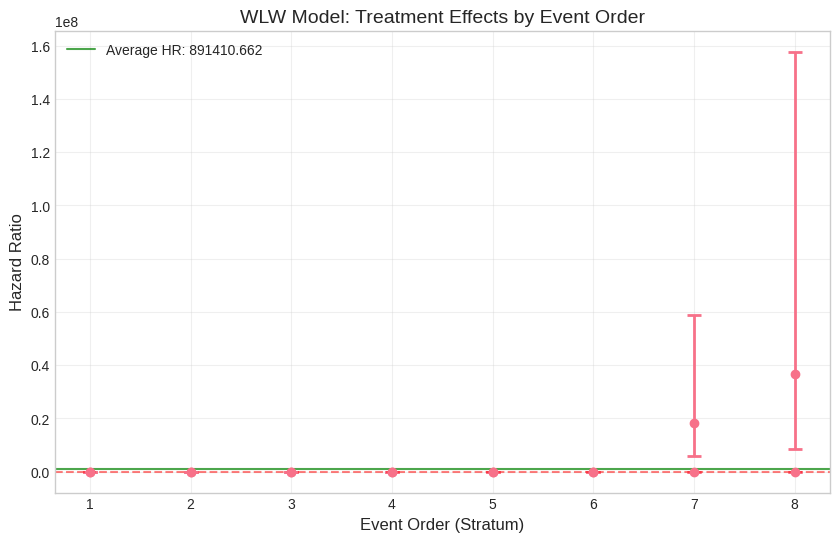

In [7]:
# Initialize the marginal model class
mrm = MarginalRecurrentModels()

# Fit WLW model with common treatment effect
print("\nFitting WLW Model with Common Treatment Effect...")
wlw_results = mrm.fit_wlw_model(df)

if 'coefficients' in wlw_results:
    print("\nWLW Model Results:")
    print("-" * 50)

    # Display coefficients by stratum
    for stratum in wlw_results['strata']:
        stratum_coef = wlw_results['coefficients'][
            wlw_results['coefficients']['stratum'] == stratum
        ]
        if not stratum_coef.empty:
            print(f"\nStratum {stratum} (Event Order {stratum}):")
            print(stratum_coef[['coef', 'exp(coef)', 'se(coef)', 'p']].to_string())

    # Display average hazard ratio
    if 'average_hr' in wlw_results:
        print(f"\nAverage Hazard Ratio (weighted by stratum size): {wlw_results['average_hr']:.3f}")

    # Visualize treatment effects across strata
    if 'coefficients' in wlw_results and len(wlw_results['coefficients']) > 0:
        fig, ax = plt.subplots(figsize=(10, 6))

        # Extract treatment effects, using the new 'covariate' column
        treatment_effects = wlw_results['coefficients'][
            wlw_results['coefficients']['covariate'].str.contains('treatment')
        ].copy()

        if not treatment_effects.empty:
            # Plot hazard ratios with confidence intervals
            strata = treatment_effects['stratum'].astype(int)
            hr = treatment_effects['exp(coef)']
            ci_lower = np.exp(treatment_effects['coef'] - 1.96 * treatment_effects['se(coef)'])
            ci_upper = np.exp(treatment_effects['coef'] + 1.96 * treatment_effects['se(coef)'])

            ax.errorbar(strata, hr, yerr=[hr - ci_lower, ci_upper - hr],
                       fmt='o', capsize=5, capthick=2, linewidth=2)
            ax.axhline(y=1, color='r', linestyle='--', alpha=0.5)

            # Plot average effect
            if 'average_hr' in wlw_results:
                ax.axhline(y=wlw_results['average_hr'], color='g',
                          linestyle='-', alpha=0.7, label=f'Average HR: {wlw_results["average_hr"]:.3f}')

            ax.set_xlabel('Event Order (Stratum)', fontsize=12)
            ax.set_ylabel('Hazard Ratio', fontsize=12)
            ax.set_title('WLW Model: Treatment Effects by Event Order', fontsize=14)
            ax.legend()
            ax.grid(True, alpha=0.3)

            plt.show()

### Marginal Mean Model

In [8]:
# Fit marginal mean model
print("\nFitting Marginal Mean Model...")
mm_results = mrm.fit_marginal_mean_model(df)

if 'marginal_means' in mm_results and mm_results['marginal_means']:
    print("\nMarginal Mean Model Results:")
    print("-" * 50)

    # Plot marginal means
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))

    # 1. Marginal mean functions
    ax1 = axes[0]
    mrm.plot_marginal_means(mm_results, ax=ax1)

    # 2. Survival curves (for death)
    ax2 = axes[1]
    survival_curves = mm_results['survival_curves']

    for treatment, kmf in survival_curves.items():
        kmf.plot_survival_function(ax=ax2, label=f'Treatment {treatment}')

    ax2.set_title('Survival Functions for Terminal Event', fontsize=12)
    ax2.set_xlabel('Time')
    ax2.set_ylabel('Survival Probability')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # 3. Cumulative hazard for recurrences
    ax3 = axes[2]
    recurrence_rates = mm_results['recurrence_rates']

    for treatment, ch in recurrence_rates.items():
        # Ensure 'ch' is not None and has at least two data points for plotting
        if ch is not None and len(ch) > 1:
            ax3.plot(ch.index, ch.iloc[:, 0],
                    label=f'Treatment {treatment}', linewidth=2)

    ax3.set_title('Baseline Cumulative Hazard for Recurrences', fontsize=12)
    ax3.set_xlabel('Time')
    ax3.set_ylabel('Cumulative Hazard')
    ax3.legend()
    ax3.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Display numerical results at specific time points
    print("\nMarginal Mean Estimates at Selected Time Points:")
    print("-" * 60)

    time_points = [12, 24, 36, 48, 60]  # Months
    for treatment, mm in mm_results['marginal_means'].items():
        print(f"\nTreatment {treatment}:")
        print(f"{'Time':>6} {'M(t)':>10} {'S(t)':>10}")
        print("-" * 30)

        for t in time_points:
            # Find closest time point
            idx = np.argmin(np.abs(mm['time'] - t))
            m_t = mm['M_t'][idx]
            s_t = mm['survival'].iloc[idx] if idx < len(mm['survival']) else np.nan

            print(f"{t:6d} {m_t:10.3f} {s_t:10.3f}")


Fitting Marginal Mean Model...


### Alternative Implementation Using lifelines

In [9]:

# Fit standard Cox model (ignoring within-subject correlation)
print("\nFitting Standard Cox Model (for comparison):")
print("-" * 50)

# Prepare data for standard Cox model
# Use first event for each subject or pooled approach
first_events = df.drop_duplicates('id', keep='first').copy()
first_events['duration'] = first_events['stop'] - first_events['start']
first_events['event'] = (first_events['status'] == 1).astype(int)

if len(first_events) > 0:
    cph_standard = CoxPHFitter()

    # Prepare covariates
    X_std = pd.get_dummies(first_events[['treatment']],
                          columns=['treatment'], drop_first=True)

    fit_data_std = pd.concat([
        first_events['duration'],
        first_events['event'],
        X_std
    ], axis=1)

    cph_standard.fit(fit_data_std,
                    duration_col='duration',
                    event_col='event')

    print("\nStandard Cox Model (First Events Only):")
    print(cph_standard.summary[['coef', 'exp(coef)', 'p']])

# Fit Andersen-Gill model (simplified)
print("\n\nAndersen-Gill Model (Pooled, with robust SE):")
print("-" * 50)

# Prepare data for AG model
ag_data = df.copy()
ag_data['duration'] = ag_data['stop'] - ag_data['start']
ag_data['event'] = (ag_data['status'] == 1).astype(int)

cph_ag = CoxPHFitter()

# Prepare covariates
X_ag = pd.get_dummies(ag_data[['treatment']],
                     columns=['treatment'], drop_first=True)
X_ag['cluster'] = ag_data['id']

fit_data_ag = pd.concat([
    ag_data['duration'],
    ag_data['event'],
    X_ag
], axis=1)

cph_ag.fit(fit_data_ag,
          duration_col='duration',
          event_col='event',
          cluster_col='cluster',
          robust=True)

print("\nAndersen-Gill Model Results:")
print(cph_ag.summary[['coef', 'exp(coef)', 'se(coef)', 'p']])


Fitting Standard Cox Model (for comparison):
--------------------------------------------------

Standard Cox Model (First Events Only):
                          coef  exp(coef)         p
covariate                                          
treatment_pyridoxine -0.353205   0.702433  0.269992
treatment_thiotepa   -0.382991   0.681819  0.205455


Andersen-Gill Model (Pooled, with robust SE):
--------------------------------------------------

Andersen-Gill Model Results:
                          coef  exp(coef)  se(coef)         p
covariate                                                    
treatment_pyridoxine  0.088438   1.092467  0.234240  0.705761
treatment_thiotepa   -0.245635   0.782208  0.228079  0.281493


### Model Comparison

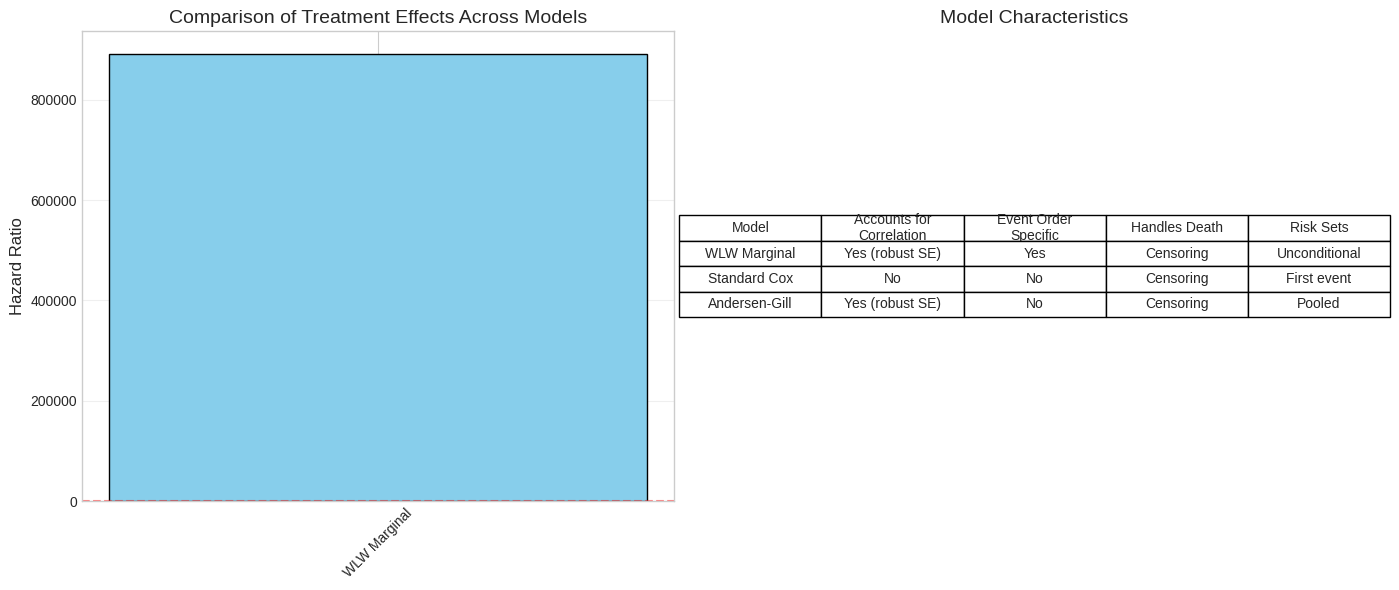

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Collect hazard ratios from different models
models_data = []

# WLW average (if available)
if 'average_hr' in wlw_results and np.isfinite(wlw_results['average_hr']):
    models_data.append({
        'Model': 'WLW Marginal',
        'HR': wlw_results['average_hr'],
        'SE': np.nan  # Simplified
    })

# Standard Cox
if 'cph_standard' in locals() and 'treatment_2.0' in cph_standard.summary.index:
    hr_std = np.exp(cph_standard.summary.loc['treatment_2.0', 'coef'])
    models_data.append({
        'Model': 'Standard Cox',
        'HR': hr_std,
        'SE': cph_standard.summary.loc['treatment_2.0', 'se(coef)']
    })

# Andersen-Gill
if 'cph_ag' in locals() and 'treatment_2.0' in cph_ag.summary.index:
    hr_ag = np.exp(cph_ag.summary.loc['treatment_2.0', 'coef'])
    models_data.append({
        'Model': 'Andersen-Gill',
        'HR': hr_ag,
        'SE': cph_ag.summary.loc['treatment_2.0', 'se(coef)']
    })

if models_data:
    models_df = pd.DataFrame(models_data)

    # Plot 1: Hazard ratios
    ax1 = axes[0]
    colors = ['skyblue', 'lightcoral', 'lightgreen']

    bars = ax1.bar(models_df['Model'], models_df['HR'],
                  color=colors[:len(models_df)], edgecolor='black')

    # Add error bars for models with SE
    for i, (_, row) in enumerate(models_df.iterrows()):
        if not np.isnan(row['SE']):
            ci_lower = np.exp(np.log(row['HR']) - 1.96 * row['SE'])
            ci_upper = np.exp(np.log(row['HR']) + 1.96 * row['SE'])

            ax1.errorbar(i, row['HR'],
                        yerr=[[row['HR'] - ci_lower], [ci_upper - row['HR']]],
                        fmt='none', color='black', capsize=5)

    ax1.axhline(y=1, color='r', linestyle='--', alpha=0.5)
    ax1.set_ylabel('Hazard Ratio', fontsize=12)
    ax1.set_title('Comparison of Treatment Effects Across Models', fontsize=14)
    ax1.tick_params(axis='x', rotation=45)
    ax1.grid(True, alpha=0.3, axis='y')

    # Plot 2: Model characteristics
    ax2 = axes[1]

    characteristics = {
        'Model': ['WLW Marginal', 'Standard Cox', 'Andersen-Gill'],
        'Accounts for\nCorrelation': ['Yes (robust SE)', 'No', 'Yes (robust SE)'],
        'Event Order\nSpecific': ['Yes', 'No', 'No'],
        'Handles Death': ['Censoring', 'Censoring', 'Censoring'],
        'Risk Sets': ['Unconditional', 'First event', 'Pooled']
    }

    chars_df = pd.DataFrame(characteristics)

    # Create table
    table_data = [chars_df.columns.tolist()] + chars_df.values.tolist()
    table = ax2.table(cellText=table_data, loc='center', cellLoc='center')
    table.auto_set_font_size(False)
    table.set_fontsize(10)
    table.scale(1.2, 1.5)

    ax2.axis('off')
    ax2.set_title('Model Characteristics', fontsize=14)

plt.tight_layout()
plt.show()

### Interpretation and Recommendations

MARGINAL MODELS FOR RECURRENT EVENTS - KEY POINTS:

1. Wei-Lin-Weissfeld (WLW) Model:
   • Estimates marginal hazard ratios for each event order
   • Uses robust standard errors to account for within-subject correlation
   • Different baseline hazards for different event orders
   • Population-averaged effects (not subject-specific)

2. Marginal Mean Model:
   • Estimates expected number of recurrences over time
   • Accounts for terminal events (death)
   • Provides absolute measures (mean number of events)
   • Useful for cost-effectiveness analyses

3. When to use each approach:
   • WLW: When interested in covariate effects on event hazard
   • Marginal Mean: When interested in cumulative burden of disease
   • Andersen-Gill: Simple alternative, assumes constant hazard ratio
   • Standard Cox: Only for first events (ignores correlation)

4. Key Assumptions:
   • WLW: Proportional hazards within each stratum
   • Marginal Mean: Independent censoring, correct specification of both models
   • All models: No unmeasured confounding

5. Practical Recommendations:
   • Always use robust standard errors for recurrent events
   • Consider both WLW and marginal mean for comprehensive analysis
   • Check proportional hazards assumption
   • Consider joint models if strong dependence between recurrent and terminal events

### Additional Diagnostics


Checking Proportional Hazards Assumption (Andersen-Gill Model):


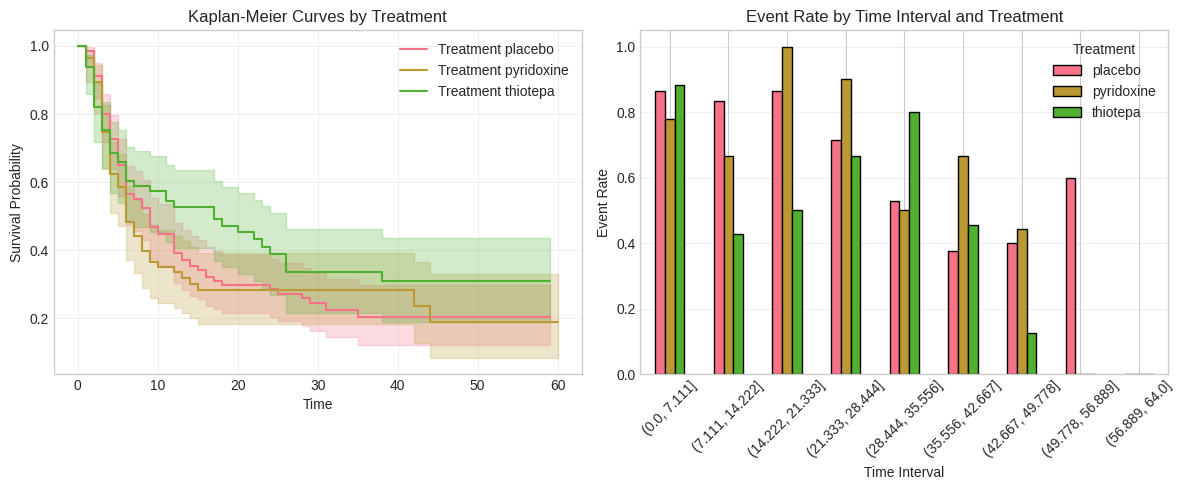

In [11]:
# Check proportional hazards assumption for AG model
if 'cph_ag' in locals():
    print("\nChecking Proportional Hazards Assumption (Andersen-Gill Model):")

    # This would typically use Schoenfeld residuals
    # Simplified check - look at log(-log(S(t))) plots by treatment

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # KM curves by treatment
    ax1 = axes[0]

    for treatment in df['treatment'].unique():
        trt_data = df[df['treatment'] == treatment]
        kmf = KaplanMeierFitter()
        kmf.fit(trt_data['stop'] - trt_data['start'],
                event_observed=(trt_data['status'] == 1))
        kmf.plot_survival_function(ax=ax1, label=f'Treatment {treatment}')

    ax1.set_title('Kaplan-Meier Curves by Treatment', fontsize=12)
    ax1.set_xlabel('Time')
    ax1.set_ylabel('Survival Probability')
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Check event patterns over time
    ax2 = axes[1]

    # Create event table by time intervals
    time_bins = np.linspace(0, df['stop'].max(), 10)
    df['time_bin'] = pd.cut(df['stop'], bins=time_bins)

    event_rate_by_bin = df.groupby(['time_bin', 'treatment'])['recur'].mean().unstack()
    event_rate_by_bin.plot(kind='bar', ax=ax2, edgecolor='black')

    ax2.set_title('Event Rate by Time Interval and Treatment', fontsize=12)
    ax2.set_xlabel('Time Interval')
    ax2.set_ylabel('Event Rate')
    ax2.tick_params(axis='x', rotation=45)
    ax2.legend(title='Treatment')
    ax2.grid(True, alpha=0.3, axis='y')

    plt.tight_layout()
    plt.show()

## Summary and Conclusion


Marginal models provide a flexible framework for analyzing recurrent event data, focusing on population-average effects while accounting for within-subject correlation. The **Wei–Lin–Weissfeld (WLW)** model is a popular choice for estimating marginal hazard ratios for ordered recurrent events, allowing different baseline hazards for each event order but typically assuming a common covariate effect. In contrast, the **marginal mean method** of Lin and Ghosh estimates the expected number of recurrent events over time while properly accounting for terminal events like death.

When choosing between these approaches, consider your scientific question:

* If you want to understand how covariates affect the instantaneous risk of recurrence, WLW is appropriate.
* If you want to estimate the expected number of recurrences over time while accounting for death, the marginal mean method is more suitable.

Both methods rely on robust variance estimation to handle within-subject correlation, making them practical for real-world recurrent event data. Always check model assumptions and consider alternative models (e.g., PWP, AG) based on your research goals.


## Resources


* **Wei, Lin & Weissfeld (1989)** – *JASA*: Introduced the **WLW model**, treating each recurrent event as a separate process (marginal Cox model).
* **Ghosh & Lin (2000)** – *Biometrics*: Proposed **marginal mean model** for recurrent events accounting for death.
* **Cook & Lawless (2007)** – *The Statistical Analysis of Recurrent Events* (book): Comprehensive reference on WLW, PWP, AG, and marginal mean models.
* **`survival`** → WLW and related models (`coxph()` with `strata(event)` and `cluster(id)`).
* **`mets`** → Fast marginal mean estimator (`recurrentMarginal()`).
* **`frailtypack`** → Joint frailty models for recurrent + terminal events.